<a href="https://colab.research.google.com/github/Yuvrajk2809/CodSoft/blob/Unsupervised-Learning/K_Means_clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
df=pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=df[["EstimatedSalary","Purchased"]]

In [ ]:
X=np.array(X)
X.shape

(400, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

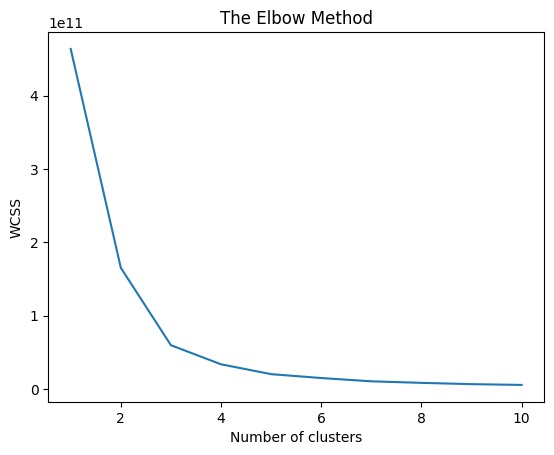

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 101)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1,

In [ ]:
X[y_kmeans == 0,0]

array([ 57000,  76000,  58000,  84000,  65000,  80000,  86000,  82000,
        80000,  74000,  90000,  72000,  84000,  79000,  89000,  83000,
        58000,  79000,  87000,  66000,  83000,  58000,  82000,  63000,
        68000,  80000,  87000,  80000,  88000,  62000,  85000,  81000,
        81000,  83000,  73000,  88000,  59000,  86000,  72000,  89000,
        86000,  80000,  71000,  71000,  61000,  80000,  57000,  75000,
        59000,  59000,  75000,  72000,  75000,  61000,  65000,  84000,
        58000,  87000,  68000,  63000,  82000,  59000,  85000,  68000,
        59000,  89000,  89000,  96000,  61000,  74000,  76000,  59000,
        75000, 100000,  90000,  69000,  86000,  71000,  88000,  72000,
        71000,  60000,  66000,  82000,  72000,  84000,  70000,  89000,
        79000,  80000,  74000,  71000,  96000,  58000,  65000,  78000,
        96000,  80000,  91000,  60000,  72000,  80000,  86000,  79000,
        57000,  80000,  82000,  59000,  88000,  72000,  97000,  90000,
      

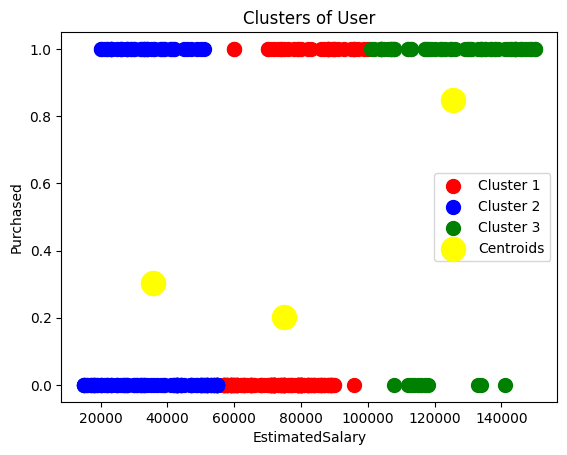

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of User')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.legend()
plt.show()